In [2]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

%matplotlib inline

In [3]:
# Read in the data
risk_df = pd.read_csv(Path('credit_risk_dataset.csv'))
risk_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
risk_df.dropna(inplace=True)
risk_df.head(25)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [5]:
# Create dummies for string valued data
risk_df = pd.get_dummies(risk_df, columns=["person_home_ownership", "loan_intent", "loan_grade", 'cb_person_default_on_file'])
risk_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1


In [6]:
# Creating the X and y sets
X = risk_df.drop(columns=['loan_status']).values
y = risk_df["loan_status"].values
X.shape

(28638, 26)

In [7]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=78)

In [8]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [9]:
# transform the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [11]:
#Model set-up
number_input_features = 26
hidden_nodes_layer1 = 25
hidden_nodes_layer2 = 15
dropout_num = 0.2
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
model.add(
    Dropout(dropout_num))
# Layer 2
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))
model.add(
    Dropout(dropout_num))
# Output layer
model.add(Dense(1, activation="sigmoid"))

In [12]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                675       
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile model
#model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
   ],
)

In [15]:
# Training the model
# Fitting the model with linear dummy data
model = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
504/504 [==============================] - 1s 1ms/step - loss: 0.4390 - accuracy: 0.8158 - tp: 1324.0000 - tn: 11817.0000 - fp: 793.0000 - fn: 2174.0000 - precision: 0.6254 - recall: 0.3785 - auc: 0.7770
Epoch 2/100
504/504 [==============================] - 1s 1ms/step - loss: 0.3575 - accuracy: 0.8638 - tp: 1914.0000 - tn: 12000.0000 - fp: 610.0000 - fn: 1584.0000 - precision: 0.7583 - recall: 0.5472 - auc: 0.8575
Epoch 3/100
504/504 [==============================] - 1s 1ms/step - loss: 0.3382 - accuracy: 0.8704 - tp: 1968.0000 - tn: 12052.0000 - fp: 558.0000 - fn: 1530.0000 - precision: 0.7791 - recall: 0.5626 - auc: 0.8714
Epoch 4/100
504/504 [==============================] - 1s 1ms/step - loss: 0.3278 - accuracy: 0.8767 - tp: 2032.0000 - tn: 12090.0000 - fp: 520.0000 - fn: 1466.0000 - precision: 0.7962 - recall: 0.5809 - auc: 0.8767
Epoch 5/100
504/504 [==============================] - 1s 1ms/step - loss: 0.3183 - accuracy: 0.8830 - tp: 2119.0000 - tn: 12104.0000 - 

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
# Create and train LR model
classifier = LogisticRegression(random_state=1)

classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [17]:
# Make LR predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(15)

,Prediction,Actual
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


<AxesSubplot:>

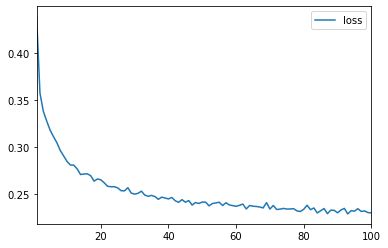

In [18]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

<AxesSubplot:>

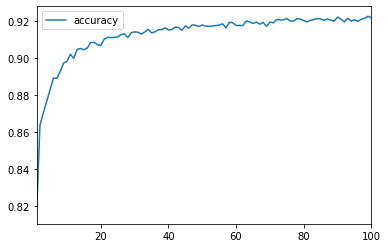

In [19]:
# Plot the accuracy
df.plot(y="accuracy")